In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

实信号，复信号 <p>
x<sub>c</sub>(t) = rect($\frac{t}{10}$)cos(10 $\pi$ $t^2$) <p>
x(t) = Hilbert(x<sub>c</sub>(t))

Text(0.5, 0, 'frequency/Hz')

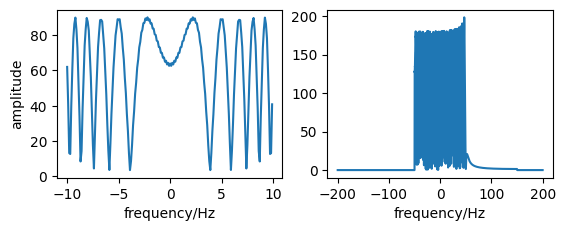

In [68]:
duaration = 10
interval_base = 1/400
t_l = np.linspace(-duaration/2,duaration/2 - interval_base,int(duaration/interval_base))
f_l = np.linspace(-0.5/interval_base,0.5/interval_base-1/interval_base/int(duaration/interval_base),int(duaration/interval_base))
# x_c_t = (np.sin(100*np.pi*t_l) + 2*np.cos(150*np.pi*t_l) + 3*np.sin(200*np.pi*t_l))\
#         *ss.get_window(window='hamming',Nx=int(duaration/interval_base))
x_c_t = ss.chirp(t_l,0,t_l[-1],100,method='linear')
x_c_t_fft = np.fft.fft(x_c_t)
x_c_t_fshift = np.fft.fftshift(x_c_t_fft)

x_t = ss.hilbert(x_c_t)*np.exp(-1j*100*np.pi*t_l)
x_t_fft = np.fft.fft(x_t)
x_t_fshift = np.fft.fftshift(x_t_fft) 

N= duaration/interval_base
plt.figure()
plt.subplot(2,2,1)
plt.plot(f_l[int(N/2-100):int(N/2+100)],np.abs(x_c_t_fshift[int(N/2-100):int(N/2+100)]))
plt.xlabel('frequency/Hz')
plt.ylabel('amplitude')
plt.subplot(2,2,2)
plt.plot(f_l,np.abs(x_t_fshift))
plt.xlabel('frequency/Hz')

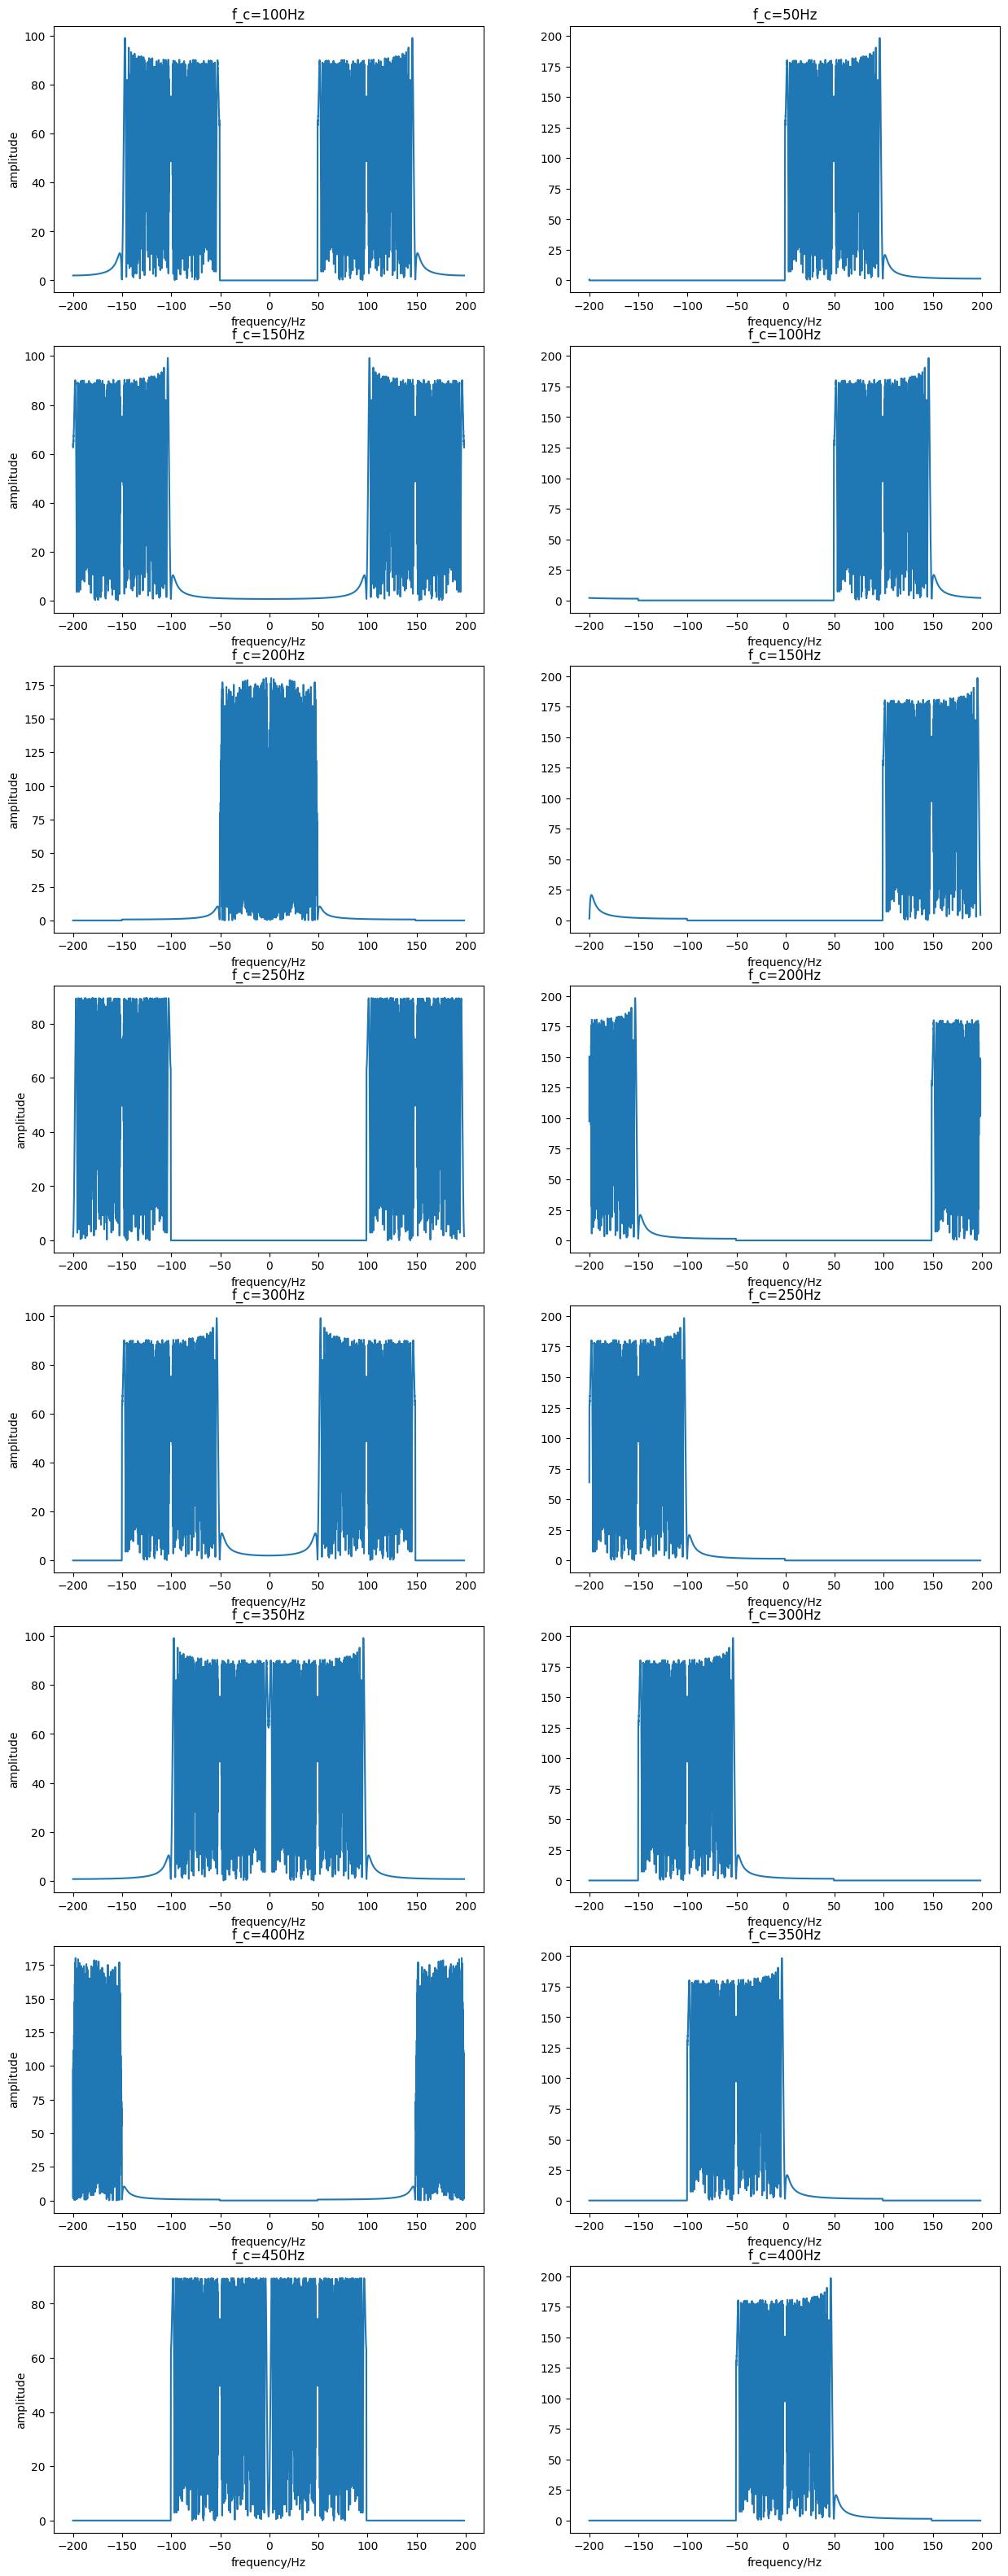

In [59]:
plt.figure(figsize=(15,40))
for i in range (1,9):


    x_t_new = ss.hilbert(x_c_t)*np.exp(-1j*(100-100*i)*np.pi*t_l)
    x_t_new_fft = np.fft.fft(x_t_new)
    x_t_new_fshift = np.fft.fftshift(x_t_new_fft) 

    x_c_new = np.real(x_t_new*np.exp(-1j*(100-200*i)*np.pi*t_l))
    x_c_new_fft = np.fft.fft(x_c_new)
    x_c_new_fshift = np.fft.fftshift(x_c_new_fft)
    plt.subplot(8,2,2*i-1)
    plt.plot(f_l,np.abs(x_c_new_fshift))
    plt.xlabel('frequency/Hz')
    plt.ylabel('amplitude')
    plt.title("f_c="+str(i*50+50)+"Hz")
    plt.subplot(8,2,2*i)
    plt.plot(f_l,np.abs(x_t_new_fshift))
    plt.xlabel('frequency/Hz')
    plt.title("f_c="+str(i*50)+"Hz")
